# 第三周作业参考答案

## 特别说明
1、第一题，特征向量矩阵中，每一列是特征向量而不是行（具体示例见文末）。

2、第二题，python中矩阵相乘，也即矩阵的叉乘。如果是np.array数据类型，要用a@b或者np.dot(a,b)；不能直接用a* b，这种计算方式是矩阵对应元素相乘。如果是np.mat数据类型，a* b则也能得到正确的矩阵相乘。

# 第一题
### 2019202449-舒纯新

### 1.1 输入矩阵，记为矩阵A

In [1]:
import pandas as pd
A=pd.read_csv('adj_8times8.csv',header=None)
A

,0,1,2,3,4,5,6,7
0,0,1,1,1,0,0,0,1
1,1,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,1
3,1,0,0,0,1,1,0,0
4,0,0,0,1,0,1,1,0
5,0,0,0,1,1,0,1,0
6,0,0,0,0,1,1,0,0
7,1,0,1,0,0,0,0,0


### 1.2求矩阵特征值和特征向量

In [2]:
import numpy as np
np.set_printoptions(precision=4) #控制输出的小数点个数是3
np.set_printoptions(suppress=True) #表示小数不需要以科学计数法的形式输出
a,b=np.linalg.eig(A)
order=np.argsort(-a) #取负可以得到升序索引
lambda1=a[order];
xi1=b[:,order];
print("特征根按顺序排列为：")
print(lambda1)
print("对应的特征向量按顺序排列为：")
print(xi1)

特征根按顺序排列为：
[ 2.8723  2.3703  0.2032  0.     -1.     -1.     -1.4458 -2.    ]
对应的特征向量按顺序排列为：
[[-0.476  -0.3248  0.2559  0.      0.5345  0.0099 -0.095  -0.5547]
 [-0.2949 -0.3025 -0.1572 -0.7071 -0.     -0.      0.4689  0.2774]
 [-0.3711 -0.3922 -0.2879 -0.     -0.5345 -0.0099 -0.583  -0.    ]
 [-0.4063  0.2274  0.6543  0.      0.      0.     -0.2175  0.5547]
 [-0.3455  0.4319 -0.0615 -0.     -0.2673 -0.7119  0.2047 -0.2774]
 [-0.3455  0.4319 -0.0615  0.     -0.2673  0.702   0.2047 -0.2774]
 [-0.2406  0.3644 -0.6053 -0.      0.5345  0.0099 -0.2832  0.2774]
 [-0.2949 -0.3025 -0.1572  0.7071 -0.     -0.      0.4689  0.2774]]


### 1.3计算两个向量并合并得到新矩阵

In [3]:
import numpy as np
np.set_printoptions(precision=4) #控制输出的小数点个数是3
np.set_printoptions(suppress=True) #表示小数不需要以科学计数法的形式输出
m1=xi1[:,1]/xi1[:,0]
m2=xi1[:,2]/xi1[:,0]
B=np.c_[m1,m2]
print("B矩阵为：")
print(B)

B矩阵为：
[[ 0.6822 -0.5377]
 [ 1.0257  0.5331]
 [ 1.057   0.7758]
 [-0.5598 -1.6104]
 [-1.2501  0.178 ]
 [-1.2501  0.178 ]
 [-1.5148  2.5161]
 [ 1.0257  0.5331]]


### 1.4 K-means聚类分析

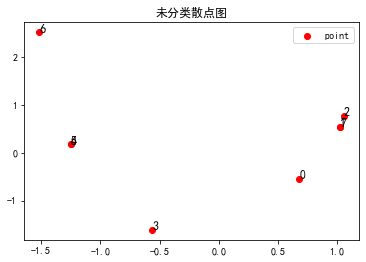

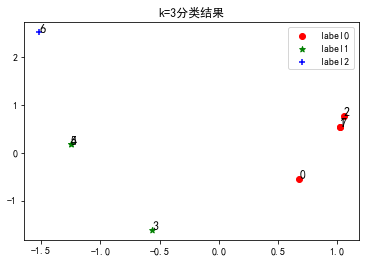

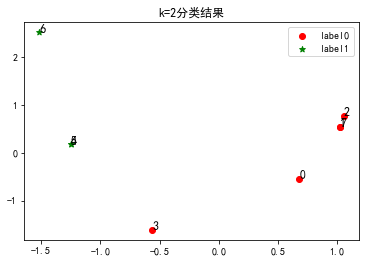

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

X =B
plt.scatter(X[:,0], X[:,1], c = "red", marker='o', label='point') #绘制数据分布图
for i in range(0,8):
    plt.annotate(i,xy=(X[i][0],X[i][1]),fontsize=12,xycoords='data')
plt.legend(loc=1)
plt.title('未分类散点图')
plt.show()
 
estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签
#绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')

for i in range(0,8):
    plt.annotate(i,xy=(X[i][0],X[i][1]),fontsize=12,xycoords='data')
plt.legend(loc=1)
plt.title('k=3分类结果')
plt.show()  #用三个分类进行聚类

estimator = KMeans(n_clusters=2)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签
#绘制k-means结果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
for i in range(0,8):
    plt.annotate(i,xy=(X[i][0],X[i][1]),fontsize=12,xycoords='data')
plt.legend(loc=1)
plt.title('k=2分类结果')
plt.show()   #用两个分类进行聚类

* 聚类结果分析

先绘制数据点观察，然后分别用三个类目标和两个类目标进行聚类，从图形直观感觉目标设定为三个的时候结果好于两个，下面进一步分析

目标设定为3个的时候，0,1,2,7为一类，3,4,5为一类，6为一类，在矩阵A中类内之间连通点几乎都符合，类间连通点较少，还是有连通点如（0,3），（4,6），（5,6），聚类实现较好。

目标设定为2个的时候，0,1,2,7为一类，3,4,5,6为一类，类内连通点基本都符合，类间连通点较三个目标更少。

总体而言，类内类间划分两个目标的表现较设定三个目标更好。

### 补充：第一题示意图，给出的原始矩阵A其实是一个网络的邻接矩阵，这个网络共有8个点，如果点i和点j之间有连接的边，那么Aij=1，且初始设定Aii=0。

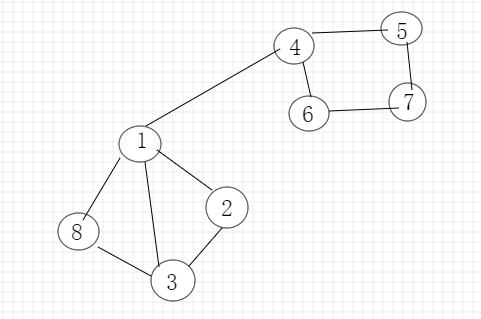

# 第二题

### 参考一  2019202449-舒纯新（np.mat形式）


## 解题过程
### 2.1计算回归方程Ax = b中的$x=(A^TA)^{-1}A^Tb$

In [14]:
import pandas as pd
import numpy as np
from numpy import *;
M=pd.read_csv('LeastSq.csv')
A =mat(np.c_[M.A1,M.A2])  #这里用的是np.mat，转成mat数据类型
A1=A.T
b = mat(M.b).T
x=(A1*A).I*A1*b
print("解得x：\n",x)

解得x：
 [[ 0.3288]
 [-0.0548]]


### 2.2 计算矩阵$x^TA^TAx$对x的一阶导数

$x^TA^TAx$对x的一阶导数为$2A^TAx$



In [15]:
x1=2*A1*A*x
print('一阶导',x1)

一阶导 [[733.48]
 [502.32]]


### 2.3计算矩阵$X^TA^TAX$对X的二阶导数

$X^TA^TAX$对X的二阶导数为$2A^TA$

In [16]:
x2=2*A1*A
print("原式对x的二阶导数为：")
print(x2)

原式对x的二阶导数为：
[[2518.18 1725.78]
 [1725.78 1189.2 ]]


### 参考二 2019202450-陈诺（np.array形式）


### 2.1 给出矩阵A和向量b，计算回归方程Ax=b中的x。矩阵A以及向量b的数据见LeastSq.csv。

参见cs229-linalg.pdf第27页

#### 代码实现

In [20]:
import pandas as pd
df = pd.read_csv("LeastSq.csv")
#展示数据
print(df)
#设置A和b的值
A = np.array(df[['A1','A2']])
b = np.array(df[['b']])
#print("矩阵A\n",A)
#print("向量b",b)

# tb1 = pt.PrettyTable()
# tb1.field_names = ["矩阵A", "向量b"]
# tb1.add_row([A,b])
# print(tb1)

     A1   A2    b
0   5.1  3.5  1.4
1   4.9  3.0  1.4
2   4.7  3.2  1.3
3   4.6  3.1  1.5
4   5.0  3.6  1.4
5   5.4  3.9  1.7
6   4.6  3.4  1.4
7   5.0  3.4  1.5
8   4.4  2.9  1.4
9   4.9  3.1  1.5
10  5.4  3.7  1.5
11  4.8  3.4  1.6
12  4.8  3.0  1.4
13  4.3  3.0  1.1
14  5.8  4.0  1.2
15  5.7  4.4  1.5
16  5.4  3.9  1.3
17  5.1  3.5  1.4
18  5.7  3.8  1.7
19  5.1  3.8  1.5
20  5.4  3.4  1.7
21  5.1  3.7  1.5
22  4.6  3.6  1.0
23  5.1  3.3  1.7
24  4.8  3.4  1.9
25  5.0  3.0  1.6
26  5.0  3.4  1.6
27  5.2  3.5  1.5
28  5.2  3.4  1.4
29  4.7  3.2  1.6
30  4.8  3.1  1.6
31  5.4  3.4  1.5
32  5.2  4.1  1.5
33  5.5  4.2  1.4
34  4.9  3.1  1.5
35  5.0  3.2  1.2
36  5.5  3.5  1.3
37  4.9  3.6  1.4
38  4.4  3.0  1.3
39  5.1  3.4  1.5
40  5.0  3.5  1.3
41  4.5  2.3  1.3
42  4.4  3.2  1.3
43  5.0  3.5  1.6
44  5.1  3.8  1.9
45  4.8  3.0  1.4
46  5.1  3.8  1.6
47  4.6  3.2  1.4
48  5.3  3.7  1.5
49  5.0  3.3  1.4


In [21]:
#解回归方程
X = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),b)

In [22]:
print("回归方程Ax=b的解为\n",X)

回归方程Ax=b的解为
 [[ 0.3288]
 [-0.0548]]


#### 2.2 计算矩阵$X^TA^TAX$对X的一阶导数

#### 代码实现

In [23]:
x1 = 2*np.dot(np.dot(A.T,A),X)
print(x1)

[[733.48]
 [502.32]]


#### 结果分析
<font face="宋体">矩阵$X^TA^TAX$对X的一阶导数为$\left[\begin{array}{1}733.48\\502.32\end{array}\right]$

### 2.3 计算矩阵$X^TA^TAX$对X的二阶导数

#### 代码实现

In [24]:
x2 = 2*np.dot(A.T,A)
print(x2)

[[2518.18 1725.78]
 [1725.78 1189.2 ]]


#### 结果分析
<font face="宋体">矩阵$X^TA^TAX$对X的二阶导数为$\left[\begin{array}{1}2518.18&1725.78\\1725.78&1189.2\end{array}\right]$

# 第三题
### 参考一2019202450-陈诺

<font face="宋体">$\quad$与使用单个合取式来进行假设表示相比，使用“析合范式”将使得假设空间具有更强的表示能力。例如$$好瓜\leftrightarrow((色泽=*)\land(根蒂=蜷缩)\land(敲声=*))\vee((色泽=乌黑)\land(根蒂=*)\land(敲声=沉闷)),$$会把“$(色泽=青绿)\land(根蒂=蜷缩)\land(敲声=清脆)$”以及“$(色泽=乌黑)\land(根蒂=硬挺)\land(敲声=沉闷)$”都分类为“好瓜”。若使用最多包含k个合取式的析合范式来表达表1.1西瓜分类问题的假设空间，试估算共有多少种可能的假设。(p19)

#### 基本设置

<font face="宋体">表1.1中“色泽”“根蒂”“敲声”分别由2、3、3种可能取值，又因为析取范式不考虑空集∅,所以一共有48个基本假设（基本合取式）在48各基本假设中有2*3*3=18个叶子假设（叶子合取式）：每个特征的取值都为具体值。任何合取式、析取式都可以用这18个叶子合取式的组合来表示。

<font face="宋体">因此可以用一个18位的二进制整数来表示任意假设：将18个叶子合取式编号，若某假设包含序号为1的叶子合取式，则该假设第一位为1，否则第一位为0。其它位类推。在这种新的表达方式下，合并合取式（或析取式）A,B，只需作 C=A|B的按位或运算，C即为表示A、B合并析取式的整数。

#### 代码实现

In [18]:
#48个基本合取式的旧表达式
hypo_old = np.array([0xff,0xf9,0xfa,0xfc,0xcf,0xd7,0xe7,0x7f,\
                      0xbf,0xc9,0xca,0xcc,0xd1,0xd2,0xd4,0xe1,\
                      0xe2,0xe4,0x79,0x7a,0x7c,0xb9,0xba,0xbc,\
                      0x4f,0x57,0x67,0x8f,0x97,0xa7,0x49,0x4a,\
                      0x4c,0x51,0x52,0x54,0x61,0x62,0x64,0x89,\
                      0x8a,0x8c,0x91,0x92,0x94,0xa1,0xa2,0xa4])
#18个叶子合取式的旧表达式
hypo_leaf = np.array([0x49,0x4a,0x4c,0x51,0x52,0x54,0x61,0x62,0x64,
                      0x89,0x8a,0x8c,0x91,0x92,0x94,0xa1,0xa2,0xa4]) 
#新的表达结果（48个整数）
hypo_const = np.zeros((48,), dtype = np.int)
#新的叶子合取式
new_leaf = np.array([0x20000,0x10000,0x08000,0x04000,0x02000,0x01000,
                     0x00800,0x00400,0x00200,0x00100,0x00080,0x00040,
                     0x00020,0x00010,0x00008,0x00004,0x00002,0x00001])
#hypo_appear来记录每个假设出现与否,出现则数组对应元素记为1,未出现为0。
def count(n_n,n_k,n_count,hypo_appear):
    #n_count=np.array([0])
    #hypo_appear = np.zeros((262143,), dtype = np.int)
    
    poslist = np.ones((n_k,), dtype = np.int)*-1
    hypo_process = np.zeros((n_k,), dtype = np.int)
        
    posflag = 0
    #poslist[0] <= n_n-n_k
    while 1:
        #如果是第一个则自增，如果超出则退出,否则直接赋值，赋值后如未达个数提前到0x3ffff跳过该点，否则进入下一轮
        if posflag == 0: 
            poslist[posflag] = poslist[posflag]+1
            if poslist[0] > n_n-n_k:
                #整个循环的退出口
                break
            hypo_process[posflag] = hypo_const[poslist[posflag]]; #直接赋值
            
            if hypo_process[posflag] == 0x3ffff and posflag<n_k-1: 
                #提前到0x3ffff跳过
                continue
            else:
                posflag = posflag+1
                #上升趋势
                trend = 1
        else:
            #上升趋势递增，下降趋势自增，如果超出则位数下降回滚上一轮，否则加入本轮假设，若无变化则跳过该点，如果未达个数提前到0x3ffff也跳过该点，否则进入下一轮
            if trend == 1:
                poslist[posflag] = poslist[posflag-1] + 1
            else:
                poslist[posflag] = poslist[posflag]+1
            if poslist[posflag] > n_n-n_k+posflag:
                #超出则位数下降
                posflag = posflag-1
                trend = 0
                continue
            
            #加入本轮假设
            hypo_process[posflag] = hypo_process[posflag-1]|hypo_const[poslist[posflag]] 
            if hypo_process[posflag] == hypo_process[posflag-1] or hypo_process[posflag] == 0x3ffff and posflag<n_k-1:
                #跳过部分
                #跳过等同回滚，自增
                trend = 0
                continue
            
            posflag = posflag+1
            trend = 1
        
        if posflag == n_k:
            #说明k个析合范式已经全部形成
            posflag = posflag-1
            trend = 0
            if hypo_appear[hypo_process[posflag]-1]==0:
                n_count[0] = n_count[0]+1
                hypo_appear[hypo_process[posflag]-1] = 1
            
            '''
            应该判断是否重复。
            不同的析取范式，有可能表示同一种假设。
            比如：(色泽=*，根蒂=*，敲声=浊响)∨(色泽=*，根蒂=*，敲声=清脆)∨(色泽=*，根蒂=*，敲声=沉闷)
            与(色泽=乌黑，根蒂=*，敲声=*)∨(色泽=青绿，根蒂=*，敲声=*)是同一种假设，
            它们都表示(色泽=*，根蒂=*，敲声=*)，它们在18位整数的表示方法下，对应的整数是唯一的。
            因此，只有在原先未出现此数（此假设）的情况下，才能将计数值自增。否则重复，不计数。
            '''        
    return n_count[0]

if __name__ == '__main__':
    for i in range(48):
        #形成新表达式
        for j in range(18):
            '''
            对hypo_old中的每个元素，循环对hypo_leaf中的18个元素xi作如下判断：
            若A|xi==A，则Anew中第i位为1，否则Anew中第i位为0. 将新的表达结果（48个整数）存在hypo_const中
            '''
            if (hypo_old[i]|hypo_leaf[j]) == hypo_old[i]:
                hypo_const[i] = hypo_const[i]|new_leaf[j]
        
    change = 0               
    n_count=np.array([0])
    hypo_appear = np.zeros((262143,), dtype = np.int)
    
    for i in range(1,19):
        count(48,i,n_count,hypo_appear)
        print("length {0:2} : {1:6}".format(i,n_count[0])) 

length  1 :     48
length  2 :    897
length  3 :   8385
length  4 :  41742
length  5 : 115821
length  6 : 201303
length  7 : 248853
length  8 : 260787
length  9 : 262143
length 10 : 262143
length 11 : 262143
length 12 : 262143
length 13 : 262143
length 14 : 262143
length 15 : 262143
length 16 : 262143
length 17 : 262143
length 18 : 262143


#### 结果分析
根据上述输出结果可得，当k=1时，可以表示出48条假设，且这些假设之间没有冗余；当k=2时，可以一共表示出897条假设，每一个条假设可含有最多2个合取式且任意两条假设之间不冗余；当k=3时，以此类推；同时，可以发现，使用最多包含9个合取式的析合范式，就可以表示整个假设空间中所有的262143个假设，再添加任意一条假设都会出现冗余。

### 参考二  2019202193-吕良波

  首先我们看表1.1，其中色泽有“青绿”和“乌黑”两种，根蒂有“蜷缩”“硬挺”“稍蜷”三种，敲声有“浊响”“清脆”“沉闷”三种。由于要考虑通配符以及出现全空集的情况,所以总共的情况的数量为 $4*3*4+1=49$，一共49种情况。这个是$k=1$的结果。此时为了解决$k>1$的情况，我们要从原来的49种情况中抽取并组合成新的假设情况，并要将冗余的情况剔除，这里冗余的就是带有$*$的情况。
  
  我们知道当$k=1$的时候，我们有$48$种基本情况和一种空的情况。为了更好的说明我计算的思路，我以存在$*$的个数进行分类，将所有的情况进行描述。
  
  当不存在$*$的时候，在里面任取的话并不会产生盈余，这种情况下我将它称为基础情况，色泽、根蒂、敲声在基础的情况下分别有$2$种、$3$种、$3$种可能性，因此，基础情况一共有$2*3*3=18$种可能性。
  
  当存在一个$*$时，相当于将对应的一类的基础情况全部覆盖。这个时候，一个$*$一共有$3*3+2*3+2*3=21$种可能性。存在两个$*$的时候，一共有$3+3+2=7$种可能性，并且会覆盖前两类的情况。三个$*$只有一种情况，它无法出现在$k>=2$的任何空间里，一旦出现一定会发生冗余。
  
  通过排除式的计算，我只计算了$k<=5$的情况。同时通过计算我们可以得到，$k$至多为$18$，超过之后一定会出现冗余，最终的结果向量为当$k=1,2,3,4,5,18$的时候，我们可以的得到最终的结果为$48,865,8028,39861,109686,1$。

### 补充说明：
#### 虽然题目中要求最多包含K个合取式，也就是给定K时，可以构造的析取式可以含有1个合取式，或2个合取式，...或K个合取式。
#### 因为数据量较大，在没有编程实现的情况下，也可以采用这种简化的方式描述自己的思路。
#### 这里只考虑了给定K值时，析取式恰好含K个合取式的情况，并没有考虑所有小于等于k的情况。

# 第四题
### 2019202193-吕良波

若数据含有噪声导致假设空间可能不存在和训练样本都一致的假设，说明假设空间的所有假设都被反类排除，因此，我将分两种情况讨论我对于这个题目归纳偏好的看法。

若给出的所有的情况都是反类，那么我们可以认为不存在正类的情况。比如说，我们发现任何种类的瓜都是不甜的瓜，那么这个时候我们可以认为“好瓜”这个并不存在。

那么剩下的就会出现这样一种情形，有其中的几个假设既存在反类又存在正类的情况，此时，我们可以将他认为是正类，以此来作为我们的偏好选择。比如，存在一种情况，它既是好瓜，同时又出现了坏瓜的情况，这个时候，我们认为它可能受到了噪声的影响，因此，我们就先将它认作是好瓜，这样一种归纳偏好有助于我们减少噪声的影响。

# 关于特征向量的补充

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3) #控制输出的小数点个数是3
np.set_printoptions(suppress=True) #表示小数不需要以科学计数法的形式输出

mat=pd.read_csv('adj_8times8.csv',header=None)
matA=np.array(mat,dtype=int)

In [2]:
matA

array([[0, 1, 1, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0]])

In [3]:
evals,vect=np.linalg.eig(matA)

In [4]:
evals

array([ 2.872,  2.37 , -2.   , -1.   , -1.446,  0.203,  0.   , -1.   ])

In [5]:
vect

array([[-0.476, -0.325, -0.555,  0.535, -0.095,  0.256,  0.   ,  0.01 ],
       [-0.295, -0.302,  0.277, -0.   ,  0.469, -0.157, -0.707, -0.   ],
       [-0.371, -0.392, -0.   , -0.535, -0.583, -0.288, -0.   , -0.01 ],
       [-0.406,  0.227,  0.555,  0.   , -0.218,  0.654,  0.   ,  0.   ],
       [-0.346,  0.432, -0.277, -0.267,  0.205, -0.061, -0.   , -0.712],
       [-0.346,  0.432, -0.277, -0.267,  0.205, -0.061,  0.   ,  0.702],
       [-0.241,  0.364,  0.277,  0.535, -0.283, -0.605, -0.   ,  0.01 ],
       [-0.295, -0.302,  0.277, -0.   ,  0.469, -0.157,  0.707, -0.   ]])

In [6]:
np.dot(matA,vect[:,0])#matA与vect第一列

array([-1.367, -0.847, -1.066, -1.167, -0.992, -0.992, -0.691, -0.847])

In [7]:
vect[:,0]*evals[0] #matA与第一个特征值

array([-1.367, -0.847, -1.066, -1.167, -0.992, -0.992, -0.691, -0.847])

#### 满足方程$Ax=\lambda x$